# Introduction

Films have been a beloved source of entertainment and technical advancement over the last century. With jobs from writers and directors to costume and stage designers, it takes a village to complete a modern film. This means hundreds, sometimes thousands, of people coming together to make a piece of art that can be enjoyed by the masses. However, art is subjective, and it's not uncommon nowadays to hear someone complaining about a new film, rather than praising it. How is it that criticism feels so much more prevelent in the modern film industry? Is it simply the mentality of "One bad apple spoils the bunch", or in this case "One negative review drowns out the positives?" This analysis hopes to answer the question: How has the average movie experience changed throughout the decades? And no, we don't mean more comfortable seating or drastically more expensive tickets. To answer this question, we are going to examine the ratings, runtime, genres, and release window for films from 1970-2024.

## The Data

Our data comes from the "16000+ Movies 1910-2024 (Metacritic)" dataset on kaggle, collected by KashifSahil. The data consists of 16,290 entries across 9 features. These features include:
1. <b>Title</b> - the name of the film
2. <b>Release Date</b> - the release date of the film in theaters
3. <b>Description</b> - a short synopsis of the plot
4. <b>Rating</b> - the average rating of the film on Metacritic
5. <b>No of Persons Voted</b> - the number of people who rated the film on Metacritic
6. <b>Directed by</b> - the director(s) of the film
7. <b>Written by</b> - the writer(s) of the film
8. <b>Duration</b> - the movies runtime
9. <b>Genres</b> - the genres the film falls under<br>

Not all of these will be used in our analysis, but it is good to keep the full scope in mind. We will go into details on each feature shortly, but it's important to acknowledge early that despite the name of the dataset, the earliest film we are working with was released in 1970, not 1910.


In [31]:
# import libraries
import pandas as pd
# pd.options.mode.chained_assignment = None
# pd.set_option("display.max_columns", None)
import numpy as np
import matplotlib.pyplot as plt
import re
from sklearn.linear_model import LinearRegression

In [15]:
# import dataset into a Pandas DataFrame
df = pd.read_csv('16k_Movies.csv', index_col=0)

# View dataset
df.head()

,Title,Release Date,Description,Rating,No of Persons Voted,Directed by,Written by,Duration,Genres
0,Dekalog (1988),"Mar 22, 1996",This masterwork by Krzysztof Kieślowski is one...,7.4,118,Krzysztof Kieslowski,"Krzysztof Kieslowski, Krzysztof Piesiewicz",9 h 32 m,Drama
1,Three Colors: Red,"Nov 23, 1994",Krzysztof Kieslowski closes his Three Colors t...,8.3,241,Krzysztof Kieslowski,"Krzysztof Kieslowski, Krzysztof Piesiewicz, Ag...",1 h 39 m,"Drama,Mystery,Romance"
2,The Conformist,"Oct 22, 1970","Set in Rome in the 1930s, this re-release of B...",7.3,106,Bernardo Bertolucci,"Alberto Moravia, Bernardo Bertolucci",1 h 47 m,Drama
3,Tokyo Story,"Mar 13, 1972",Yasujiro Ozu’s Tokyo Story follows an aging co...,8.1,147,Yasujirô Ozu,"Kôgo Noda, Yasujirô Ozu",2 h 16 m,Drama
4,The Leopard (re-release),"Aug 13, 2004","Set in Sicily in 1860, Luchino Visconti's spec...",7.8,85,Luchino Visconti,"Giuseppe Tomasi di Lampedusa, Suso Cecchi D'Am...",3 h 7 m,"Drama,History"


In [16]:
# dataset dimensions
df.shape

(16290, 9)

In [17]:
# dataset features and datatypes
df.dtypes

,0
Title,object
Release Date,object
Description,object
Rating,float64
No of Persons Voted,object
Directed by,object
Written by,object
Duration,object
Genres,object


## Preprocessing

Our preprocessing begins by examining duplicate entries. As early as the 12th entry, we can see some films releasing under the same name, as well as individual films being recorded twice.

In [18]:
# "Moonlight" entries
df[11:15]

,Title,Release Date,Description,Rating,No of Persons Voted,Directed by,Written by,Duration,Genres
11,Moonlight,"Oct 21, 2016","Moonlight is the tender, heartbreaking story o...",NaN,NaN,Paula van der Oest,Carel Donck,1 h 31 m,Thriller
12,Moonlight,"Oct 21, 2016","Moonlight is the tender, heartbreaking story o...",NaN,NaN,Paula van der Oest,Carel Donck,1 h 31 m,Thriller
13,Moonlight,"Dec 9, 2005",Moonlight relates the story of the teenage Cla...,NaN,NaN,Paula van der Oest,Carel Donck,1 h 31 m,Thriller
14,Moonlight,"Dec 9, 2005",Moonlight relates the story of the teenage Cla...,NaN,NaN,Paula van der Oest,Carel Donck,1 h 31 m,Thriller


In [19]:
# Number of duplicate entries, ignoring the first appearance
df.duplicated().sum()

1117

Above, we can witness that over 1100 entries in our table are duplicates, and gazing back to the table above we can see that similarities arise even beyond the same entry appearing twice. For a better example, let's look at the table's entries for the Disney classic: "Beauty and the Beast" <br><br>
Below you will find that "Beauty and the Beast" is represented in our data 9 times. However, we can see how many entries of the movie there should be by looking at the <b>Description</b> and <b>Release Date</b>. We can see three unique iterations of the film, released on different days and with different plot synopses, indicating three films by the same name. This begs the question then, why are all three films recorded with the same <b>Rating</b>, <b>Number of Voters</b>, <b>Directors</b>, <b>Writers</b>, and <b>Duration</b>? This appears to be an inputting error during the compiling of the data.

In [20]:
# "Beauty and the Beast" entries
df[39:48]

,Title,Release Date,Description,Rating,No of Persons Voted,Directed by,Written by,Duration,Genres
39,Beauty and the Beast,"Nov 22, 1991",This 'tale as old as time' follows the adventu...,7.8,38,"Jean Cocteau, \n \n René Clément","Jean Cocteau, Jeanne-Marie Leprince de Beaumont",1 h 33 m,"Drama,Fantasy,Romance"
40,Beauty and the Beast,"Nov 22, 1991",This 'tale as old as time' follows the adventu...,7.8,38,"Jean Cocteau, \n \n René Clément","Jean Cocteau, Jeanne-Marie Leprince de Beaumont",1 h 33 m,"Drama,Fantasy,Romance"
41,Beauty and the Beast,"Nov 22, 1991",This 'tale as old as time' follows the adventu...,7.8,38,"Jean Cocteau, \n \n René Clément","Jean Cocteau, Jeanne-Marie Leprince de Beaumont",1 h 33 m,"Drama,Fantasy,Romance"
42,Beauty and the Beast,"Mar 17, 2017","Belle (Emma Watson), a bright, beautiful and i...",7.8,38,"Jean Cocteau, \n \n René Clément","Jean Cocteau, Jeanne-Marie Leprince de Beaumont",1 h 33 m,"Drama,Fantasy,Romance"
43,Beauty and the Beast,"Mar 17, 2017","Belle (Emma Watson), a bright, beautiful and i...",7.8,38,"Jean Cocteau, \n \n René Clément","Jean Cocteau, Jeanne-Marie Leprince de Beaumont",1 h 33 m,"Drama,Fantasy,Romance"
44,Beauty and the Beast,"Mar 17, 2017","Belle (Emma Watson), a bright, beautiful and i...",7.8,38,"Jean Cocteau, \n \n René Clément","Jean Cocteau, Jeanne-Marie Leprince de Beaumont",1 h 33 m,"Drama,Fantasy,Romance"
45,Beauty and the Beast,"Sep 23, 2016","1810. After losing his fortune at sea, a ruine...",7.8,38,"Jean Cocteau, \n \n René Clément","Jean Cocteau, Jeanne-Marie Leprince de Beaumont",1 h 33 m,"Drama,Fantasy,Romance"
46,Beauty and the Beast,"Sep 23, 2016","1810. After losing his fortune at sea, a ruine...",7.8,38,"Jean Cocteau, \n \n René Clément","Jean Cocteau, Jeanne-Marie Leprince de Beaumont",1 h 33 m,"Drama,Fantasy,Romance"
47,Beauty and the Beast,"Sep 23, 2016","1810. After losing his fortune at sea, a ruine...",7.8,38,"Jean Cocteau, \n \n René Clément","Jean Cocteau, Jeanne-Marie Leprince de Beaumont",1 h 33 m,"Drama,Fantasy,Romance"


We should also take a look at empty or null values in our data.

In [21]:
# Number of null values per column
df.isnull().sum()

,0
Title,0
Release Date,0
Description,0
Rating,3444
No of Persons Voted,3461
Directed by,7
Written by,963
Duration,13
Genres,5


Here we find that there are roughly 3400 null entries in rating alone. With rating being a prime numerical value for analysis, that won't do. The first step in our preprocessing is to remove invalid data. We begin by removing the duplicate entries, as mentioned above. Following, we will remove all entries containing null values in <b>Rating</b> and <b>No of Persons Voted</b>. Luckily, these values are nearly exclusively correlated, with any film missing a <b>Rating</b> value also missing a <b>No of Persons Voted</b> value too. This is a lot of data being cut, however we remain with nearly 12,000 entries remaining.

In [22]:
# Remove duplicate entries
df = df.drop_duplicates()

# Remove entries containing null values in "No of Persons Voted" column
df = df[df['No of Persons Voted'].notnull()]

# Size of dataset after removal
df.shape


(11909, 9)

In [23]:
# Number of null values per column after removal
df.isnull().sum()

,0
Title,0
Release Date,0
Description,0
Rating,0
No of Persons Voted,0
Directed by,3
Written by,460
Duration,2
Genres,4


We can observe that a lot of entries with null values overlapped in several features. Next is the formating of our data before we begin playing with it. As shown earlier, the dataset is comprised mostly of Object type data, which won't function as nicely with our model and analysis. First, we will convert the numerical data of <b>No of Persons Voted</b> to an integer. The <b>Rating</b> is already in float form, so no change is needed there.

In [24]:
# Converts "No of Persons Voted" column to integer
df['No of Persons Voted'] = df['No of Persons Voted'].replace(',','', regex=True).astype(int)

# Summary statistics of "Rating" and "No of Persons Voted" columns
df.describe()

,Rating,No of Persons Voted
count,11909.000000,11909.000000
mean,6.618272,136.745571
std,1.415623,376.056193
min,0.300000,4.000000
25%,5.800000,11.000000
50%,6.800000,31.000000
75%,7.600000,116.000000
max,10.000000,10639.000000


Changing <b>No of Persons Voted</b> allows mathmatical operations to be performed, such as finding the mean of values. Next is the <b>Duration</b> feature. It's original form represents a string with an easily readable "X hours and Y minutes" structure, but for our purposes, it will be most useful as an integer value of "X minutes".

In [25]:
# Defines the function to convert duration to minutes
def convert_to_minutes(duration):
    if not isinstance(duration, str):
        return 0
    match = re.match(r'(?:(\d+) h)? ?(?:(\d+) m)?', duration)
    if match:
        hours = int(match.group(1)) if match.group(1) else 0
        minutes = int(match.group(2)) if match.group(2) else 0
        return hours * 60 + minutes
    else:
        return 0
df['Duration'] = df['Duration'].apply(convert_to_minutes).astype(int)

# Summary statistics including the "Duration" column
df.describe()

,Rating,No of Persons Voted,Duration
count,11909.000000,11909.000000,11909.000000
mean,6.618272,136.745571,105.158787
std,1.415623,376.056193,22.393372
min,0.300000,4.000000,0.000000
25%,5.800000,11.000000,93.000000
50%,6.800000,31.000000,102.000000
75%,7.600000,116.000000,115.000000
max,10.000000,10639.000000,729.000000


Next is the conversion of the <b>Release Date</b> feature from Object to DateTime. We see the shift from the string style "Month Day, Year" structure, to the "YYYY-MM-DD" structure (or Year-Month-Day). We also see the change to <b>Duration</b> in a table style, and yes: the first movie in the table is nearly 10 hours long.

In [26]:
# Converts "Release Date" column to datetime
df['Release Date'] = pd.to_datetime(df['Release Date'], format='%b %d, %Y')

# View dataset
df.head()

,Title,Release Date,Description,Rating,No of Persons Voted,Directed by,Written by,Duration,Genres
0,Dekalog (1988),1996-03-22,This masterwork by Krzysztof Kieślowski is one...,7.4,118,Krzysztof Kieslowski,"Krzysztof Kieslowski, Krzysztof Piesiewicz",572,Drama
1,Three Colors: Red,1994-11-23,Krzysztof Kieslowski closes his Three Colors t...,8.3,241,Krzysztof Kieslowski,"Krzysztof Kieslowski, Krzysztof Piesiewicz, Ag...",99,"Drama,Mystery,Romance"
2,The Conformist,1970-10-22,"Set in Rome in the 1930s, this re-release of B...",7.3,106,Bernardo Bertolucci,"Alberto Moravia, Bernardo Bertolucci",107,Drama
3,Tokyo Story,1972-03-13,Yasujiro Ozu’s Tokyo Story follows an aging co...,8.1,147,Yasujirô Ozu,"Kôgo Noda, Yasujirô Ozu",136,Drama
4,The Leopard (re-release),2004-08-13,"Set in Sicily in 1860, Luchino Visconti's spec...",7.8,85,Luchino Visconti,"Giuseppe Tomasi di Lampedusa, Suso Cecchi D'Am...",187,"Drama,History"


Almost done now, the feature of <b>Genres</b> will be adjusted from a string of genres together to unique columns for each genre type in the table, including "Unknown". This process uses "One-Hot" encoding to generate boolean dummy variables. The variables are created, renamed, and added to the original datset. The existing <b>Genres</b> feature is removed. Observing the shape of the dataset now reveals 31 total features, of which 22 are the new Genre variables. This may seem like over-complicating something simple, but this will allow us to inquire about specific genres in our analysis later.

In [27]:
# Generate dummy variables by seperating genres with a comma
genre_dummies = df['Genres'].str.get_dummies(sep=',').astype(bool)
# Rename columns with genre names
genre_dummies.columns = [f'Genres_{col}' for col in genre_dummies.columns]
# Add dummy variables to original dataframe
df = pd.concat([df, genre_dummies], axis=1)
# Remove original genre column
df = df.drop('Genres', axis=1)

# View dataset
df.shape

(11909, 31)

Finally, since we are cleaning up so much data, we may as well correct the <b>Title</b>, <b> Description</b>, <b>Directed by</b>, and <b>Written by</b> attributes. Simply convert these entities from Objects to Strings. We specifically use .astype('string') instead of .astype(str) as this will allow us to keep our null values where present. These values will not impact data analysis, so there is no need to remove these entries.

In [28]:
# Convert "Title", "Description", "Directed by", and "Written by" columns to string
df['Title'] = df['Title'].astype('string')
df['Description'] = df['Description'].astype('string')
df['Directed by'] = df['Directed by'].astype('string')
df['Written by'] = df['Written by'].astype('string')

# View dataset
df.head()


,Title,Release Date,Description,Rating,No of Persons Voted,Directed by,Written by,Duration,Genres_Action,Genres_Adventure,...,Genres_Musical,Genres_Mystery,Genres_News,Genres_Romance,Genres_Sci-Fi,Genres_Sport,Genres_Thriller,Genres_Unknown,Genres_War,Genres_Western
0,Dekalog (1988),1996-03-22,This masterwork by Krzysztof Kieślowski is one...,7.4,118,Krzysztof Kieslowski,"Krzysztof Kieslowski, Krzysztof Piesiewicz",572,False,False,...,False,False,False,False,False,False,False,False,False,False
1,Three Colors: Red,1994-11-23,Krzysztof Kieslowski closes his Three Colors t...,8.3,241,Krzysztof Kieslowski,"Krzysztof Kieslowski, Krzysztof Piesiewicz, Ag...",99,False,False,...,False,True,False,True,False,False,False,False,False,False
2,The Conformist,1970-10-22,"Set in Rome in the 1930s, this re-release of B...",7.3,106,Bernardo Bertolucci,"Alberto Moravia, Bernardo Bertolucci",107,False,False,...,False,False,False,False,False,False,False,False,False,False
3,Tokyo Story,1972-03-13,Yasujiro Ozu’s Tokyo Story follows an aging co...,8.1,147,Yasujirô Ozu,"Kôgo Noda, Yasujirô Ozu",136,False,False,...,False,False,False,False,False,False,False,False,False,False
4,The Leopard (re-release),2004-08-13,"Set in Sicily in 1860, Luchino Visconti's spec...",7.8,85,Luchino Visconti,"Giuseppe Tomasi di Lampedusa, Suso Cecchi D'Am...",187,False,False,...,False,False,False,False,False,False,False,False,False,False


And this concludes our data cleaning and preprocessing, which means its time to move on to...

## Data Visualization

Below are two early visualizations of some numerical data across the decades. The first plot is the average rating of films per year, which shows a fairly dramatic fall from the late 80's to today, dropping almost a full point on the 10-point scale. The second plot is the average duration of films per year, where despite a spike in the late 70's, this aspect seems to hold more steady through the decades.

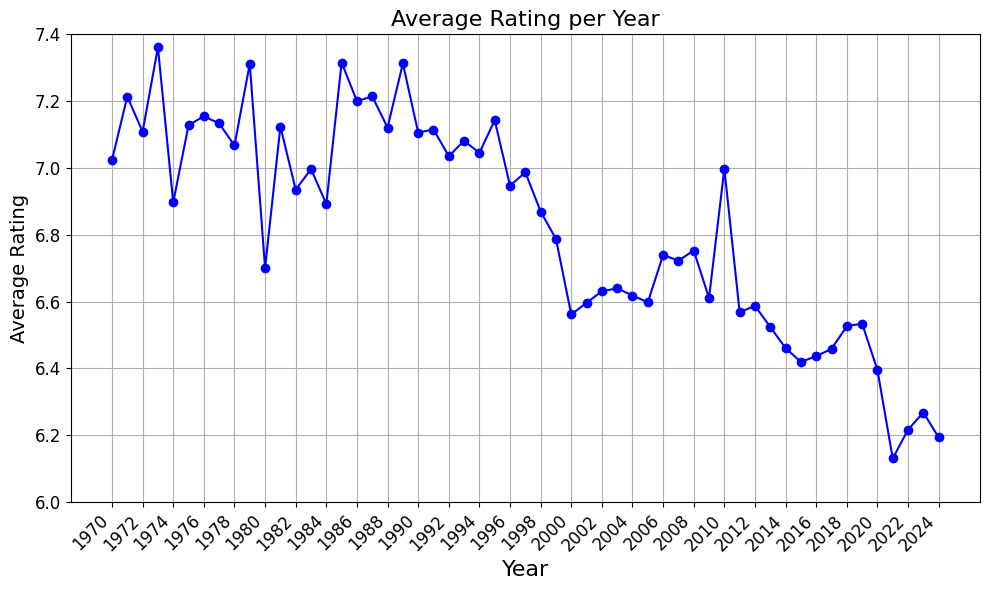

In [29]:
df['Year'] = df['Release Date'].dt.year
average_rating_per_year = df.groupby('Year')['Rating'].mean()

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(average_rating_per_year.index, average_rating_per_year.values, marker='o', linestyle='-', color='b')
plt.title('Average Rating per Year', fontsize=16)
plt.xlabel('Year', fontsize=16)
plt.ylabel('Average Rating', fontsize=14)
plt.ylim(6,7.4)
plt.grid(True)
plt.xticks(average_rating_per_year.index[::2], rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

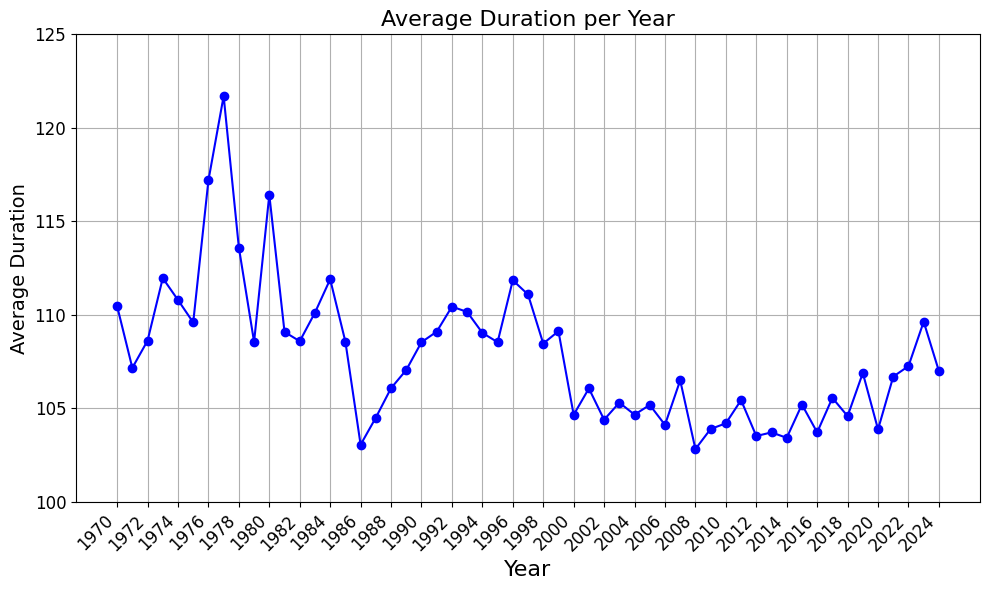

In [30]:
df['Year'] = df['Release Date'].dt.year
duration_filtered = df[df['Duration'] > 0]
average_duration_per_year = duration_filtered.groupby('Year')['Duration'].mean()

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(average_duration_per_year.index, average_duration_per_year.values, marker='o', linestyle='-', color='b')
plt.title('Average Duration per Year', fontsize=16)
plt.xlabel('Year', fontsize=16)
plt.ylabel('Average Duration', fontsize=14)
plt.grid(True)
plt.xticks(average_duration_per_year.index[::2], rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.ylim(100, 125)
plt.tight_layout()
plt.show()